#### Predicting House Sale Prices
The Data
We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

#### Feature Columns
- id - Unique ID for each home sold
- date - Date of the home sale
- price - Price of each home sold
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms, where .5 accounts for a room with a - - - toilet but no shower
- sqft_living - Square footage of the apartments interior living space
- sqft_lot - Square footage of the land space
- floors - Number of floors
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
- view - An index from 0 to 4 of how good the view of the property was
- condition - An index from 1 to 5 on the condition of the apartment,
- grade - An index from 1 to 13, where 1-3 falls short of building - - - - - construction and design, 7 has an average level of construction and - - - design, and 11-13 have a high quality level of construction and design.
- sqft_above - The square footage of the interior housing space that is above ground level
- sqft_basement - The square footage of the interior housing space that is below ground level
- yr_built - The year the house was initially built
- yr_renovated - The year of the house’s last renovation
- zipcode - What zipcode area the house is in
- lat - Lattitude
- long - Longitude
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


In [ ]:
from google.colab import files
import pandas as pd
data_to_load = files.upload()

Saving kc_house_data.csv to kc_house_data (1).csv


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['kc_house_data.csv']))

##### Exploratory Data Analysis

In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


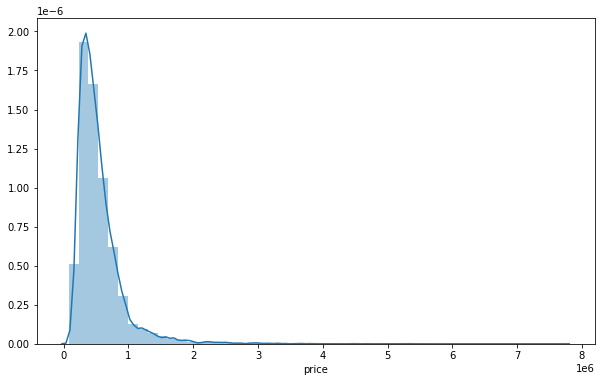

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

From the above distribution, the houses price falls from 0 to around 1.5 million

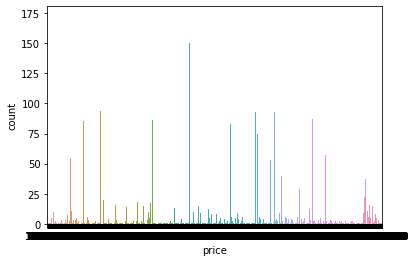

In [ ]:
sns.countplot(df['price'])

In [ ]:
corrmat = df.corr()

numer_corr = corrmat['price'].abs().sort_values()
numer_corr

id               0.016772
long             0.022036
condition        0.036056
zipcode          0.053402
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

In [ ]:
str_cormat= numer_corr[numer_corr>0.4]


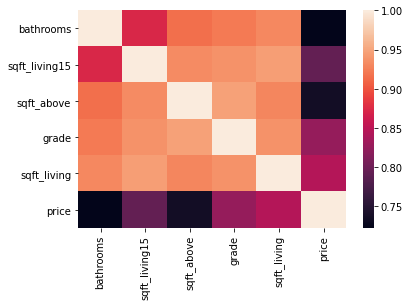

In [ ]:
strong_corr = corrmat[str_cormat.index].corr()
sns.heatmap(strong_corr)

Few features are playing important role like bathrooms,sqft_living,grade .The potential collinearity between some of these feature columns. Collinearity is when 2 feature columns are highly correlated and stand the risk of duplicating information. If we have 2 features that convey the same information using 2 different measures or metrics, we don't need to keep both.

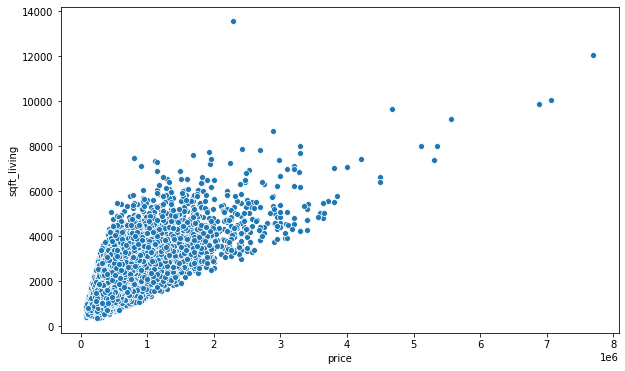

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='sqft_living',data=df)

#### Geographical Properties

The price also varies depends upon the latitude and longitude

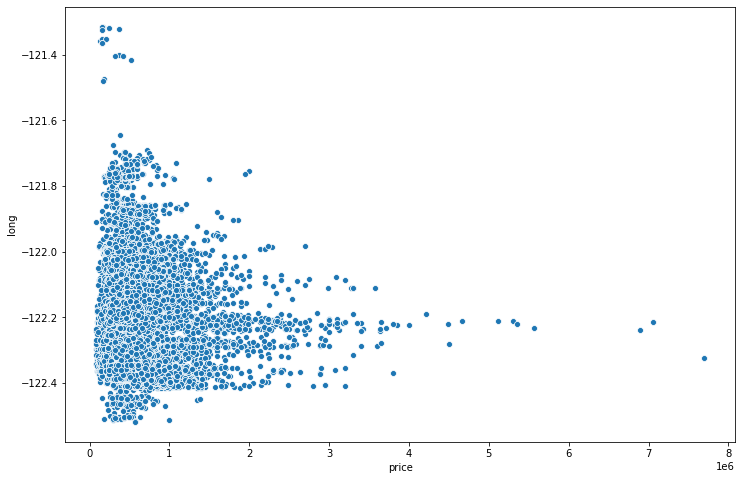

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

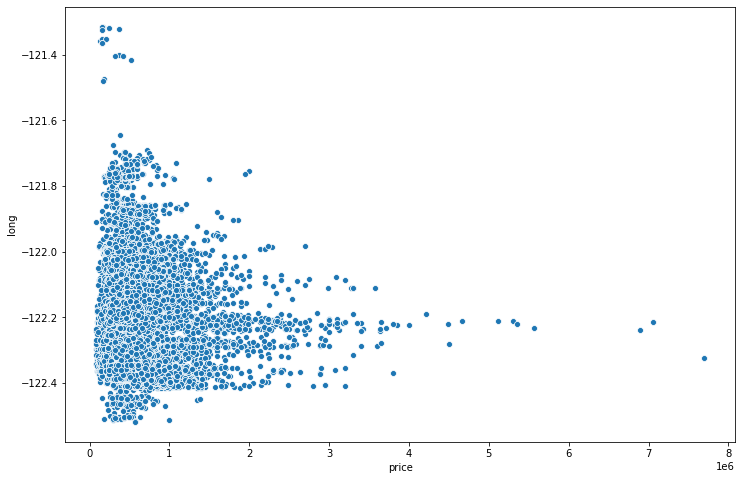

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

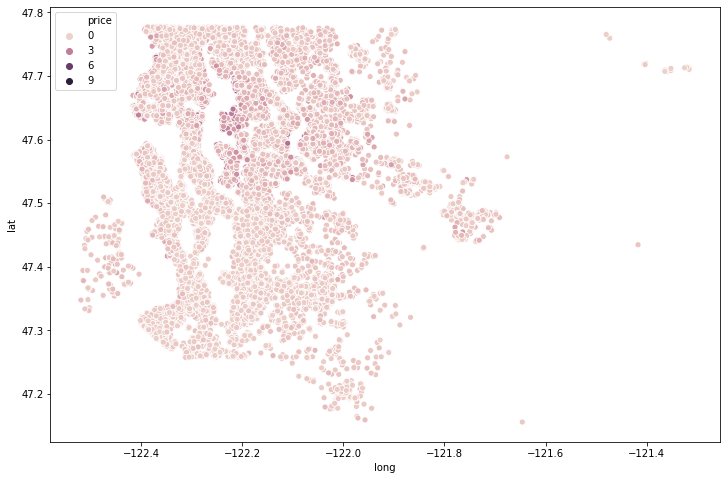

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [ ]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


The above list is for the most expensive s. Around 1% of the homes are have high sale prices

In [ ]:
len(df)*(0.01)

215.97

Nearly 216 houses are having high sale prices.

In [ ]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

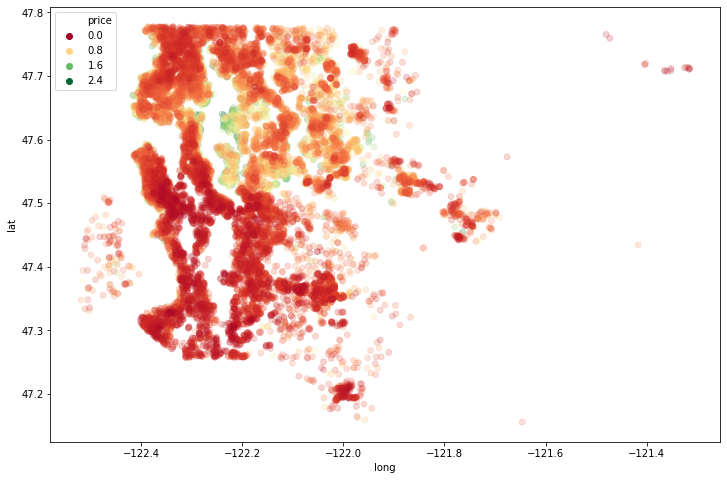

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat',data=non_top_1_perc, hue='price',palette="RdYlGn",edgecolor=None,alpha=0.2)

Seems waterfont properties are expensive . Let's visualize these houses with the help of using boxplot

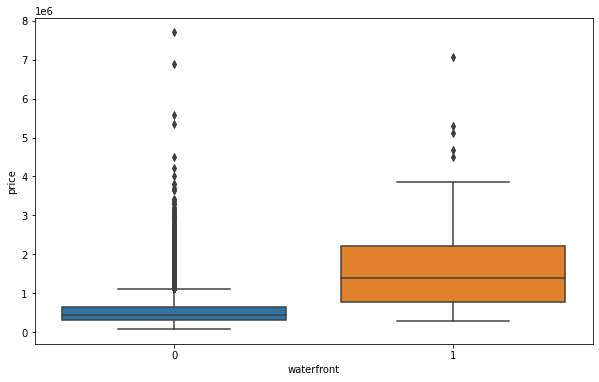

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='waterfront',y='price',data=df)

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.corr()['zipcode'].abs().sort_values()

condition        0.002888
id               0.008211
waterfront       0.030272
price            0.053402
floors           0.059541
yr_renovated     0.064325
sqft_basement    0.074725
view             0.084622
sqft_lot         0.129586
sqft_lot15       0.147294
bedrooms         0.154092
grade            0.185771
sqft_living      0.199802
bathrooms        0.204786
sqft_above       0.261570
lat              0.266742
sqft_living15    0.279299
yr_built         0.347210
long             0.564259
zipcode          1.000000
Name: zipcode, dtype: float64

Feature Engineering

In [ ]:
#changing date to datetime
df['date']=pd.to_datetime(df['date'])

In [ ]:
df['month']=df['date'].apply(lambda date: date.month)


In [ ]:
df['year'] = df['date'].apply(lambda date:date.year)

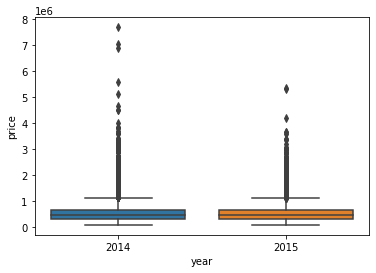

In [ ]:
sns.boxplot(x='year',y='price',data=df)

In [ ]:
df = df.drop('date',axis=1)

In [ ]:
df = df.drop('zipcode',axis=1)

In [ ]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

#### Scaling and Train Test Split

In [ ]:
X= df.drop('price',axis=1).values
y = df['price'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=101)

In [ ]:
X_train.shape

(14469, 18)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

Going to fit and transform by using fit_tranform() method on the train data so that we learn the parameters of scaling on the train data and in the same time we scale the train data.

In [ ]:
scaler= MinMaxScaler()
X_train = scaler.fit_transform(X_train)

We only use transform() on the test data because we use the scaling paramaters learned on the train data to scale the test data.
We dont fit our test data set because we dont want to assume prior information about our test set.

In [ ]:
X_test =scaler.transform(X_test)

In [ ]:
X_train.shape


(14469, 18)

In [ ]:
X_test.shape

(7128, 18)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

model.add(Dense(18,activation='relu'))
model.add(Dense(18,activation='relu'))
model.add(Dense(18,activation='relu'))
model.add(Dense(18,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

Training the Model

In [ ]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
114/114 [==============================] - 0s 2ms/step - loss: 29763258368.0000 - val_loss: 27970568192.0000
Epoch 2/400
114/114 [==============================] - 0s 2ms/step - loss: 29778137088.0000 - val_loss: 27879440384.0000
Epoch 3/400
114/114 [==============================] - 0s 2ms/step - loss: 29758783488.0000 - val_loss: 27840825344.0000
Epoch 4/400
114/114 [==============================] - 0s 2ms/step - loss: 29782355968.0000 - val_loss: 27916736512.0000
Epoch 5/400
114/114 [==============================] - 0s 2ms/step - loss: 29752578048.0000 - val_loss: 27825141760.0000
Epoch 6/400
114/114 [==============================] - 0s 2ms/step - loss: 29756401664.0000 - val_loss: 27879995392.0000
Epoch 7/400
114/114 [==============================] - 0s 2ms/step - loss: 29735854080.0000 - val_loss: 27809255424.0000
Epoch 8/400
114/114 [==============================] - 0s 2ms/step - loss: 29752107008.0000 - val_loss: 27816034304.0000
Epoch 9/400
114/114 [===========

In [ ]:
losses=pd.DataFrame(model.history.history)

history returns a dictionary by conveting this dictionary into dataframe we can compare the loss and validation_loss data inorder to see the data is overfitting

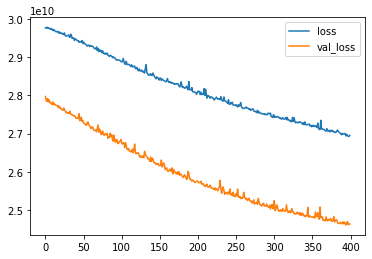

In [ ]:
losses.plot()

By comparing the plot behaviour it decreasing in both the train loss and validation loss.This data is not overfitting,because of the data is going down and continue down together

Evaluation on Test Data

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [ ]:
predictions= model.predict(X_test)

In [ ]:
mean_absolute_error(y_test,predictions)

97714.56114201916

In [ ]:
np.sqrt(mean_squared_error(y_test,predictions))

156953.68817996676

In [ ]:
df['price'].mean()

540296.5735055795

From the MAE the price is off around 18% of the original price

Best possible score for explained variance is 1

In [ ]:
explained_variance_score(y_test,predictions)

0.8105546481528014

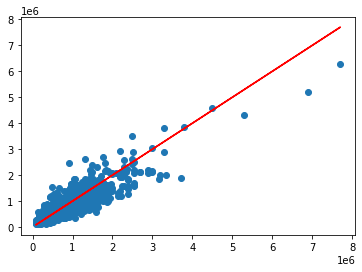

In [ ]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')